# Evaluation

In [2]:
%cd ..

C:\Users\Stefan\Desktop\Treca Godina\ORI\Image Captioning\ORI_ML


In [138]:
from PIL import Image
from data_preprocessing import *
from main import get_model
import urllib.request
import io
import matplotlib.pyplot as plt
from IPython.display import Image 
import random

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [277]:
model, dataset, dataloader, optimizer = get_model()

In [467]:
def predict(img_vec, img, caption=None):
    model.eval()
    out, _ = model.evaluate(img_vec)
    display(img)

    print("Predicted: " + " ".join(out))
    if caption is not None:
        print("Real: " + model.vocab.decode_and_clean(caption.tolist()))

In [468]:
def predict_random():
    idx = random.randint(0, len(dataset) -1)
    img_vec, caption, name = dataset[idx] 
    img = get_image_from_path(name)
    predict(img_vec, img, caption)

In [469]:
caption

tensor([  4, 460, 236, 389,  12,   4, 138, 311,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0], dtype=torch.int16)

In [470]:
url = 'https://cdn.vox-cdn.com/thumbor/vQ_TbE_e04tsWLhQqMCG40Nn33o=/0x0:600x450/1200x900/filters:focal(0x0:600x450):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/19650209/Kitchen_0719-Brookline_Shot7A-Kitchen_StraightOnFromDiningArea-27.0.0.jpg'
url = 'https://static.dezeen.com/uploads/2020/01/hoxton-southwark-hotel-interiors-ennismore-london_dezeen_2364_sq.jpg'
img_vec, img  = preprocess_image_web(url)
img_vec = img_vec.reshape(1,64,2048)


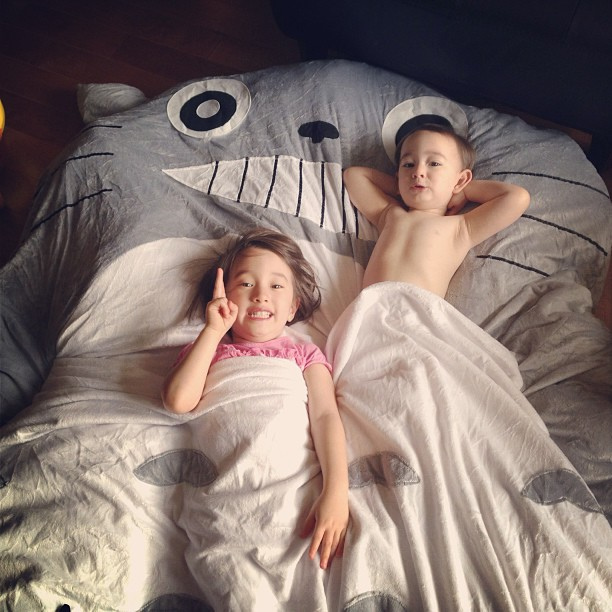

Predicted: a cow sitting on a woman sitting on a woman sitting on a woman sitting on a woman sitting on


In [477]:
url = 'mscoco\\test\\img\\COCO_val2014_000000012741'
model.eval()
img_vec, img = preprocess_image(url)
img_vec = img_vec.reshape(1,64,2048)

predict(img_vec, img)

In [25]:
len(weights)

2

In [ ]:
# import torch
# def evaluate_caption(img_vec, img):
#     model.eval()
#     img2 = np.array(img)
#     fig = plt.figure(figsize=(10, 10))
#     result, weights = model.evaluate(img_vec)
#     len_result = len(result)
#     for l in range(len_result):
#         temp_att = torch.reshape(weights[l].cpu(), (8, 8)).numpy()
#         ax = fig.add_subplot(len_result, len_result, l+1)
#         ax.set_title(result[l])
#         img = ax.imshow(img2)
#         ax.imshow(temp_att, cmap='gray', alpha=0.8, extent=img.get_extent())

#     plt.tight_layout()
#     plt.show()